# Step 1

In this step we will first load the information using panda



In [1]:
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df["Heart Disease"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0})
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# EDA


In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


# Prep 70/30


In [5]:
features = ['Age', 'Chest pain type', 'BP', 'Max HR', 'ST depression', 'Cholesterol', 'Number of vessels fluro']
X = df[features]
Y = df['Heart Disease']

### Target Distribution

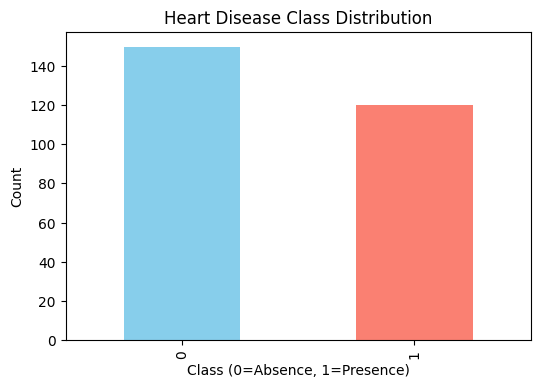

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['Heart Disease'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Class Distribution')
plt.xlabel('Class (0=Absence, 1=Presence)')
plt.ylabel('Count')
plt.show()

### Splitting and Normalization (70/30)

In [7]:
np.random.seed(42)
indices = np.random.permutation(len(X))
test_size = int(len(X) * 0.3)
test_indices = indices[:test_size]
train_indices = indices[test_size:]

X_train = X.iloc[train_indices]
y_train = Y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = Y.iloc[test_indices]
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
X_train.head()

Training set shape: (189, 7)
Test set shape: (81, 7)


,Age,Chest pain type,BP,Max HR,ST depression,Cholesterol,Number of vessels fluro
84,0.246231,0.815872,-1.214864,-1.019234,0.288067,-0.961454,-0.722221
251,-1.177273,-1.253925,-0.100797,1.690859,-0.966420,-0.618955,-0.722221
92,-0.082270,0.815872,-0.435017,-1.762324,0.873495,0.275348,0.311868
201,0.355731,0.815872,-0.379313,0.947769,-0.966420,0.922291,1.345957
126,0.793733,0.815872,-0.657830,-2.199435,0.538965,0.294376,1.345957


# Step 2: Implement Basic Logistic Regression
Sigmoid, cost (binary cross-entropy), GD (gradients, updates; track costs).

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    epsilon = 1e-15
    f_wb = np.clip(f_wb, epsilon, 1 - epsilon)
    cost = -1/m * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    return cost

def compute_gradient(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    err = f_wb - y
    dj_dw = 1/m * np.dot(X.T, err)
    dj_db = 1/m * np.sum(err)
    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 100 == 0 or i == num_iters-1:
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)            
    return w, b, J_history

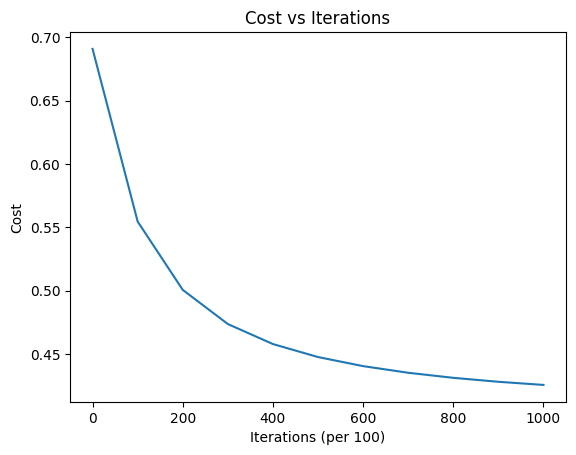

Final Cost: 0.4254237797435778
Final Weights: [-0.02075859  0.63556506  0.22667984 -0.44172155  0.75230054  0.05150139
  0.64377153]
Final Bias: -0.10988199982824576


In [9]:
np.random.seed(1)
initial_w = np.zeros(X_train.shape[1])
initial_b = 0
iterations = 1000
alpha = 0.01
w_final, b_final, J_hist = gradient_descent(X_train.to_numpy(), y_train.to_numpy(), initial_w, initial_b, alpha, iterations)

plt.plot(range(0, iterations + 1, 100), J_hist)
plt.title('Cost vs Iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations (per 100)')
plt.show()

print(f"Final Cost: {J_hist[-1]}")
print(f"Final Weights: {w_final}")
print(f"Final Bias: {b_final}")

In [10]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    return (sigmoid(z) >= 0.5).astype(int)

y_pred_train = predict(X_train.to_numpy(), w_final, b_final)
y_pred_test = predict(X_test.to_numpy(), w_final, b_final)

def calculate_metrics(y_true, y_pred, set_name):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"--- {set_name} Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

calculate_metrics(y_train, y_pred_train, "Train")
calculate_metrics(y_test, y_pred_test, "Test")

--- Train Metrics ---
Accuracy: 0.8466
Precision: 0.8642
Recall: 0.7955
F1 Score: 0.8284

--- Test Metrics ---
Accuracy: 0.7654
Precision: 0.7826
Recall: 0.5625
F1 Score: 0.6545



# Step 3: Visualize Decision Boundaries
Select ≥3 feature pairs, train 2D models, and plot.

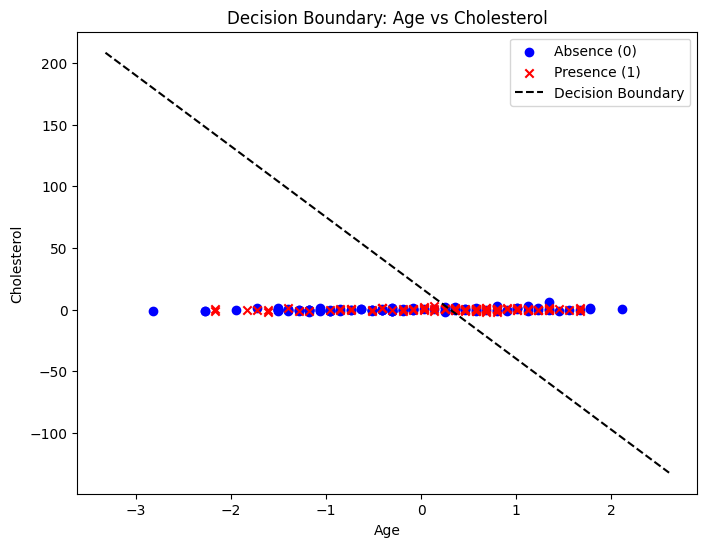

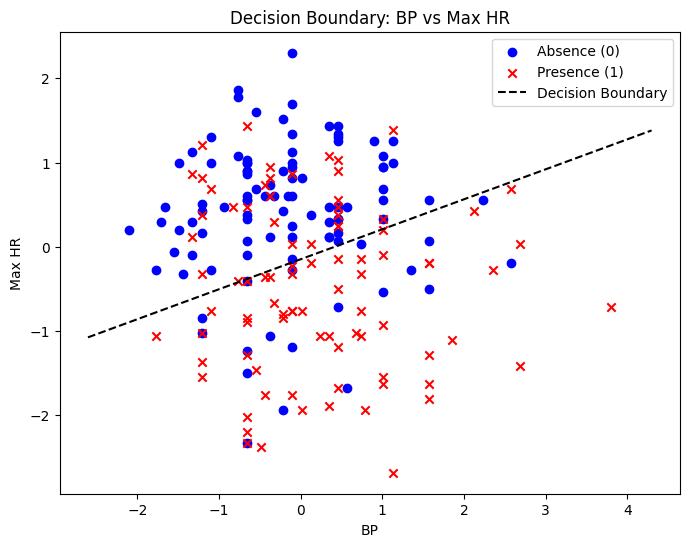

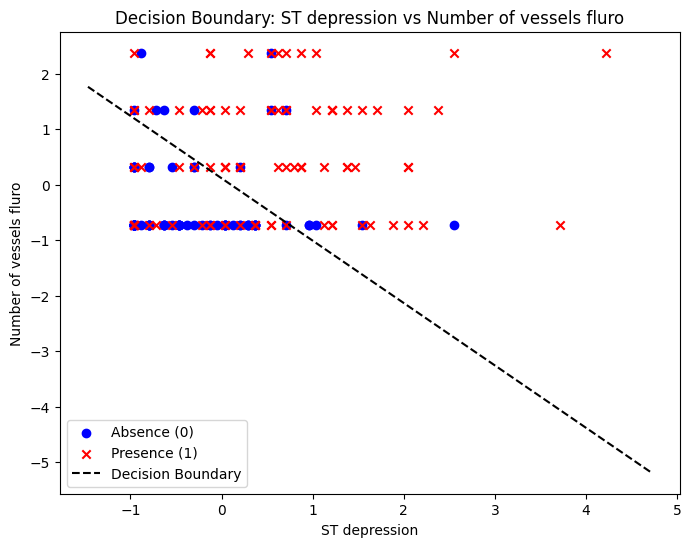

In [11]:
def plot_decision_boundary(w, b, X, y, feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Absence (0)', marker='o')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Presence (1)', marker='x')
    
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_vals = np.linspace(x1_min, x1_max, 100)
    
    if w[1] != 0:
        x2_vals = -(w[0] * x1_vals + b) / w[1]
        plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
    else:
        plt.axvline(x=-b/w[0], color='k', linestyle='--', label='Decision Boundary')
        
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.title(f'Decision Boundary: {feature_names[0]} vs {feature_names[1]}')
    plt.show()

feature_pairs = [
    ['Age', 'Cholesterol'],
    ['BP', 'Max HR'],
    ['ST depression', 'Number of vessels fluro']
]

for pair in feature_pairs:
    X_pair_train = X_train[pair].to_numpy()
    
    w_pair_init = np.zeros(2)
    w_pair, b_pair, _ = gradient_descent(X_pair_train, y_train.to_numpy(), w_pair_init, 0, 0.01, 1000)
    
    plot_decision_boundary(w_pair, b_pair, X_pair_train, y_train.to_numpy(), pair)

# Step 4: Repeat with Regularization (L2)

In [12]:
def compute_cost_reg(X, y, w, b, lambda_reg):
    m = len(y)
    cost_no_reg = compute_cost(X, y, w, b)
    reg_term = (lambda_reg / (2 * m)) * np.sum(w**2)
    return cost_no_reg + reg_term

def compute_gradient_reg(X, y, w, b, lambda_reg):
    m = len(y)
    dj_dw, dj_db = compute_gradient(X, y, w, b)
    dj_dw += (lambda_reg / m) * w
    return dj_dw, dj_db

def gradient_descent_reg(X, y, w, b, alpha, num_iters, lambda_reg):
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_reg(X, y, w, b, lambda_reg)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 100 == 0:
            J_history.append(compute_cost_reg(X, y, w, b, lambda_reg))
            
    return w, b, J_history

lambdas = [0, 0.001, 0.01, 0.1, 1]

print("--- Regularization Tuning ---")
for lam in lambdas:
    w_reg, b_reg, _ = gradient_descent_reg(X_train.to_numpy(), y_train.to_numpy(), 
                                           np.zeros(X_train.shape[1]), 0, 
                                           0.01, 1000, lam)
    
    y_pred_tun = predict(X_test.to_numpy(), w_reg, b_reg)
    acc = np.mean(y_pred_tun == y_test)
    print(f"Lambda: {lam}, Test Accuracy: {acc:.4f}")

--- Regularization Tuning ---
Lambda: 0, Test Accuracy: 0.7654
Lambda: 0.001, Test Accuracy: 0.7654
Lambda: 0.01, Test Accuracy: 0.7654
Lambda: 0.1, Test Accuracy: 0.7654
Lambda: 1, Test Accuracy: 0.7654
